In [1]:
import pandas as pd
import numpy as np
import json
from datetime import date
import calendar
import networkx as nx

In [2]:
df2=pd.read_excel("INDIA.XLSX")
dic={}
df2
df2=df2.loc[(df2['Unnamed: 5'] == "All ages") & (df2["Unnamed: 4"]=="Total")& (df2["Unnamed: 6"]=="Total")]
df2
for index, row in df2.iterrows():
    dic[row["Unnamed: 3"].lstrip("State -")[0:-5].upper()]=row["Unnamed: 7"]
dic.pop("")
#dic
dic["DELHI NCT"]=dic["NCT OF DELHI"]
dic["JAMMU AND KASHMIR"]=dic["JAMMU & KASHMIR"]
dic["SIKKIM"]=dic["IKKIM"]
dic.pop("IKKIM")
dic.pop("JAMMU & KASHMIR")
dic.pop("NCT OF DELHI")
dic

{'HIMACHAL PRADESH': 921080,
 'PUNJAB': 3743486,
 'CHANDIGARH': 260786,
 'UTTARAKHAND': 1624197,
 'HARYANA': 3626260,
 'RAJASTHAN': 7219526,
 'UTTAR PRADESH': 14412965,
 'BIHAR': 6909439,
 'ARUNACHAL PRADESH': 253224,
 'NAGALAND': 254685,
 'MANIPUR': 195764,
 'MIZORAM': 136261,
 'TRIPURA': 354081,
 'MEGHALAYA': 208756,
 'ASSAM': 2896119,
 'WEST BENGAL': 8933321,
 'JHARKHAND': 2999009,
 'ODISHA': 4454572,
 'CHHATTISGARH': 3002954,
 'MADHYA PRADESH': 7947991,
 'GUJARAT': 9521542,
 'DAMAN & DIU': 106707,
 'DADRA & NAGAR HAVELI': 118095,
 'MAHARASHTRA': 20620198,
 'ANDHRA PRADESH': 11096243,
 'KARNATAKA': 9197706,
 'GOA': 435131,
 'LAKSHADWEEP': 15479,
 'KERALA': 6010350,
 'TAMIL NADU': 10526724,
 'PUDUCHERRY': 276741,
 'ANDAMAN & NICOBAR ISLANDS': 96383,
 'DELHI NCT': 2600912,
 'JAMMU AND KASHMIR': 829109,
 'SIKKIM': 102474}

In [3]:
df=pd.read_csv("Scraped.csv")
x=df["5"][6]
print(x)
df
passengers=[]
for i in range(len(df)):
    temp=0
    x=df["18"][i]
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
        if temp==0:
            print(x)
            y=x
        passengers.append(temp)
passengers=list(filter(lambda a: a != 0, passengers))


def df_states(df):
    for i in range(len(df)):
        x=df["19"][i]
        x=x.strip('][').split(',')
        for j in range(1,len(x),2):
            print(x[j])
#df_states(df)

Jul 01
['  L', '', ' G1', ' G2', ' G3', ' G4', ' G5', ' G6', ' G7', ' G8', ' G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', '']
['  L', '', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11', 'G10', ' G9', ' G8', ' G7', ' G6', ' G5', ' G4', ' G3', ' G2', ' G1', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['  L', '', ' G1', ' G2', ' G3', ' G4', ' G5', ' G6', ' G7', ' G8', ' G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', '']
['  L', '', 'G19', 'G18', 'G17', 'G16', 'G15', 'G14', 'G13', 'G12', 'G11', 'G10', ' G9', ' G8', ' G7', ' G6', ' G5', ' G4', ' G3', ' G2', ' G1', '']


In [4]:
print(sum(passengers)/len(passengers))

1592.4638140517698


In [5]:
#df_states(df)    

In [6]:
#_=x.strip('][').split(',')
dic_month={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}



In [61]:
def create():
    lis=[*dic]
    df=pd.DataFrame(data=0,columns=lis, index = lis)
    return df
dfG=create()
def get_passengers(x):
    temp=0
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
    if temp>0:
        return temp
    else:
        return 1590
def get_weekdays(string):
    string=string.replace(" ","")
    #print(len(string), string)
    return len(string)
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]

def checkruns_weight(row):      #Assumption: The end date is not in 2022. And the start date is either in 2020 or 2021
    s=row[21]
    e=row[22]
    days=0
#     TS=date(2020,5,1)
#     TE=date(2020,7,31)
#     TS=date(2020,8,1)
#     TE=date(2020,10,31)
    TS=date(2021,1,1)
    TE=date(2021,3,1)
    
    try:
        s,years=separator(s)
        e,yeare=separator(e)
        #
        sm,sd=s.split(" ")
        em,ed=e.split(" ")
        #
        sm=dic_month[sm]
        em=dic_month[em]
        #
        date_s=date(int(years),int(sm),int(sd))
        date_e=date(int(yeare),int(em),int(ed))
        #
        #days=date_e-date_s
        if(TS>date_s):
            CS=TS
        else:
            CS=date_s
        if(TE>date_e):
            CE=date_e
        else:
            CE=TE
        days=CE-CS
    except:
        days=date(2021,6,10)-date(2021,6,10)
#         try:
#             sm,sd=s.split(" ")
#             sm=dic_month[sm]
#             date_e=date(2021,6,10)
#             date_s=date(2021,int(sm),int(sd))
#             days=date_e-date_s
#         except:
#             days=date(2021,6,10)-date(2021,6,10)


    days=days.days
    if days<0:       #365-days for total
        days=360+days
    runs=days/7*get_weekdays(row[14])*get_passengers(row[19])
    return runs
checkruns_weight(df.loc[6])                #
#get_weekdays(df.loc[0][14])
#get_passengers(df.loc[1][19])

0.0

In [ ]:
def create():
    lis=[*dic]
    df=pd.DataFrame(data=0,columns=lis, index = lis)
    return df
dfG=create()
def get_passengers(x):
    temp=0
    x=x.replace("EOG","")
    #x=x.strip('][').split(',')
    if(len(x)>8):
        for j in x:
            if (j.startswith("D")):
                temp+=106
            if (j.startswith("H")):
                temp+=22
            if (j.startswith("B")):
                temp+=72
            if (j.startswith("S") or j.startswith("C")):
                temp+=80
            if (j.startswith("A") or j.startswith("E")):
                temp+=54
    if temp>0:
        return temp
    else:
        return 1590
def get_weekdays(string):
    string=string.replace(" ","")
    #print(len(string), string)
    return len(string)
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]

def checkruns_weight(row):      #Assumption: The end date is not in 2022. And the start date is either in 2020 or 2021
    s=row[21]
    e=row[22]
    days=0
    TS=date(2020,6,1)
    try:
        s,years=separator(s)
        e,yeare=separator(e)
        sm,sd=s.split(" ")
        em,ed=e.split(" ")
        sm=dic_month[sm]
        em=dic_month[em]
        date_s=date(int(years),int(sm),int(sd))
        date_e=date(int(yeare),int(em),int(ed))
        days=date_e-date_s
    except:
        try:
            sm,sd=s.split(" ")
            sm=dic_month[sm]
            date_e=date(2021,6,10)
            date_s=date(2021,int(sm),int(sd))
            days=date_e-date_s
        except:
            days=date(2021,6,10)-date(2021,6,10)

    days=days.days
    if days<0:       #365-days for total
        days=360+days
    runs=days/7*get_weekdays(row[14])*get_passengers(row[19])
    return runs
checkruns_weight(df.loc[6])                #
#get_weekdays(df.loc[0][14])
#get_passengers(df.loc[1][19])

In [62]:
def separator(string):
    string=string[4:]
    dm,year=string.split(",")
    return dm,year[1:]


In [63]:
dfG=create()
for index,row in df.iterrows():                 
    x=row[20]
    x=x.strip('][').split(',')
    y=[]
    for i in range(1,len(x),2):
        var=x[i].strip(" '").upper()
        if var not in y:
            y.append(var)
        else:
            pass
    print(y)
    if "TELANGANA" in y:
        if "ANDHRA PRADESH" in y:
            y.remove("TELANGANA")
        else:
            dunno=y.index("TELANGANA")
            y[dunno]="ANDHRA PRADESH"
            
            
    temp=[]
    for i in y:
        try:
            temp.append(dic[i])
        except KeyError:
            if i =="TELANGANA":
                #temp.append(dic("ANDHRA PRADESH"))
                
                if "ANDHRA PRADESH" in y:
                    y.remove(i)
                else:
                    dunno=y.index("TELANGANA")
                    y[dunno]="ANDHRA PRADESH"
                    #print(y)
                    temp.append(dic["ANDHRA PRADESH"])
    print(y)
    print(temp)
    lis=[sum(temp[(i):len(temp)]) for i in range(len(y))]

    capacity=checkruns_weight(row)
    for i in range(len(y)-1):
        for j in range(i+1,len(y)):
            if (i==0):
                den=lis[i]-temp[i]          #Temp is the mig inside of i and and lis is from i to len(y)
                test=y[i]
                test=temp[j]
                dfG[y[i]][y[j]]+=temp[j]*capacity/den
            else:
                den2=lis[i]-temp[i]
                mult1=capacity*temp[i]/lis[i]
                mult2=temp[j]/den2
                dfG[y[i]][y[j]]+=mult1*mult2
            
                
            
#break

['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
[6010350, 10526724, 11096243, 20620198, 7947991, 14412965]
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
['HARYANA', 'CHANDIGARH', 'DELHI NCT']
[3626260, 260786, 2600912]
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
['DELHI NCT', 'HARYANA', 'CHANDIGARH']
[2600912, 3626260, 260786]
['PUNJAB', 'HARYANA', 'DELHI NCT']
['PUNJAB', 'HARYANA', 'DELHI NCT']
[3743486, 3626260, 2600912]
['DELHI NCT', 'HARYANA', 'PUNJAB']
['DELHI NCT', 'HARYANA', 'PUNJAB']
[2600912, 3626260, 3743486]
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
['DELHI NCT', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
[2600912, 3626260, 3743486, 829109]
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT']
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT']
[829109, 3743486, 3626260, 2600912]
['RAJASTHAN', 'UTTAR PRADESH', 'BIHAR', 

['JHARKHAND', 'UTTAR PRADESH', 'DELHI NCT']
['JHARKHAND', 'UTTAR PRADESH', 'DELHI NCT']
[2999009, 14412965, 2600912]
['ASSAM', 'NAGALAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'CHANDIGARH']
['ASSAM', 'NAGALAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'CHANDIGARH']
[2896119, 254685, 8933321, 6909439, 14412965, 3626260, 260786]
['BIHAR']
['BIHAR']
[6909439]
['ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
['ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
[2896119, 8933321, 6909439, 2999009]
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[8933321, 2999009, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[2600912, 14412965, 6909439, 2999009, 8933321]
['ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM']
['ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM']
[4454572, 8933321, 6909439, 2

['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
['MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL']
[20620198, 3002954, 4454572, 2999009, 8933321]
['TELANGANA', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'BIHAR']
['ANDHRA PRADESH', 'MAHARASHTRA', 'CHHATTISGARH', 'ODISHA', 'JHARKHAND', 'BIHAR']
[11096243, 20620198, 3002954, 4454572, 2999009, 6909439]
['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
['WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH', 'MAHARASHTRA']
[8933321, 2999009, 4454572, 3002954, 20620198]
['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'JHARKHAND', 'WEST BENGAL']
['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'JHARKHAND', 'WEST BENGAL']
[7219526, 3626260, 2600912, 14412965, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'RAJASTHAN']
['WEST BENGAL', 'JHARKH

['WEST BENGAL', 'JHARKHAND', 'CHHATTISGARH', 'MAHARASHTRA']
['WEST BENGAL', 'JHARKHAND', 'CHHATTISGARH', 'MAHARASHTRA']
[8933321, 2999009, 3002954, 20620198]
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'ODISHA', 'JHARKHAND', 'WEST BENGAL', 'BIHAR']
['KARNATAKA', 'ANDHRA PRADESH', 'ODISHA', 'JHARKHAND', 'WEST BENGAL', 'BIHAR']
[9197706, 11096243, 4454572, 2999009, 8933321, 6909439]
['MAHARASHTRA', 'CHHATTISGARH', 'JHARKHAND', 'WEST BENGAL']
['MAHARASHTRA', 'CHHATTISGARH', 'JHARKHAND', 'WEST BENGAL']
[20620198, 3002954, 2999009, 8933321]
['MAHARASHTRA']
['MAHARASHTRA']
[20620198]
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
[20620198, 9521542, 7947991, 7219526, 14412965]
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[14412965, 7219526, 7947991, 9521542, 20620198]
['TELANGANA', 'KAR

['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[1624197, 14412965, 6909439, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
[8933321, 2999009, 6909439, 14412965, 1624197]
['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[1624197, 14412965, 6909439, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
[8933321, 2999009, 6909439, 14412965, 1624197]
['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[1624197, 14412965, 6909439, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHA

['KERALA', 'TAMIL NADU', 'KARNATAKA']
['KERALA', 'TAMIL NADU', 'KARNATAKA']
[6010350, 10526724, 9197706]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU']
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU']
[2600912, 14412965, 7947991, 20620198, 11096243, 10526724]
['TAMIL NADU', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
['TAMIL NADU', 'ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
[10526724, 11096243, 20620198, 7947991, 14412965, 2600912]
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
['MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR']
[20620198, 7947991, 14412965, 6909439]
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA']
['BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHAR

['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['UTTARAKHAND', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[1624197, 14412965, 6909439, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'UTTARAKHAND']
[8933321, 2999009, 6909439, 14412965, 1624197]
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
[829109, 3743486, 3626260, 14412965, 6909439, 2999009, 8933321]
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
['WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'HARYANA', 'PUNJAB', 'JAMMU AND KASHMIR']
[8933321, 2999009, 6909439, 14412965, 3626260, 3743486, 829109]
['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL']
['RAJASTHAN', 'HAR

['ASSAM', 'WEST BENGAL', 'BIHAR', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
['ASSAM', 'WEST BENGAL', 'BIHAR', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU', 'KARNATAKA']
[2896119, 8933321, 6909439, 4454572, 11096243, 10526724, 9197706]
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL']
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL']
[9197706, 10526724, 11096243, 4454572, 8933321]
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM']
['KARNATAKA', 'TAMIL NADU', 'ANDHRA PRADESH', 'ODISHA', 'WEST BENGAL', 'BIHAR', 'ASSAM']
[9197706, 10526724, 11096243, 4454572, 8933321, 6909439, 2896119]
['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'PUNJAB', 'JAMMU AND KASHMIR']
['RAJASTHAN', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'PUNJAB', 'JAMMU AND KASHMIR']
[7219526, 3626260, 2600912, 14412965, 3743486, 829109]
['KARNATAKA', 'TELANGANA']
['KARNATAKA', 'ANDHRA PRADESH']
[9197706, 11096243]
['WEST BENGAL', 

['WEST BENGAL', 'BIHAR']
['WEST BENGAL', 'BIHAR']
[8933321, 6909439]
['BIHAR', 'WEST BENGAL']
['BIHAR', 'WEST BENGAL']
[6909439, 8933321]
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'DELHI NCT']
['KERALA', 'KARNATAKA', 'GOA', 'MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'DELHI NCT']
[6010350, 9197706, 435131, 20620198, 9521542, 7947991, 7219526, 2600912]
['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
['DELHI NCT', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'KERALA']
[2600912, 7219526, 7947991, 9521542, 20620198, 435131, 9197706, 6010350]
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
['WEST BENGAL', 'JHARKHAND', 'BIHAR']
[8933321, 2999009, 6909439]
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
['BIHAR', 'JHARKHAND', 'WEST BENGAL']
[6909439, 2999009, 8933321]
['CHHATTISGARH', 'MAHARASHTRA']
['CHHATTISGARH', 'MAHARASHTRA']
[3002954, 20620198]
['MAHARASHTRA', 'CHH

['TRIPURA', 'ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
['TRIPURA', 'ASSAM', 'WEST BENGAL', 'BIHAR', 'JHARKHAND']
[354081, 2896119, 8933321, 6909439, 2999009]
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'PUNJAB', 'RAJASTHAN']
[2896119, 8933321, 6909439, 14412965, 2600912, 3626260, 3743486, 7219526]
['RAJASTHAN', 'HARYANA', 'PUNJAB', 'DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
['RAJASTHAN', 'HARYANA', 'PUNJAB', 'DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
[7219526, 3626260, 3743486, 2600912, 14412965, 6909439, 8933321, 2896119]
['TELANGANA', 'MAHARASHTRA']
['ANDHRA PRADESH', 'MAHARASHTRA']
[11096243, 20620198]
['MAHARASHTRA', 'TELANGANA']
['MAHARASHTRA', 'ANDHRA PRADESH']
[20620198, 11096243]
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
['WEST BENGAL', 'ODISHA', 'ANDHRA PRADESH', 'TAMIL NADU']
[8933321, 44545

['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND']
[20620198, 9521542, 7947991, 7219526, 14412965, 1624197]
['MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
['MADHYA PRADESH', 'UTTAR PRADESH', 'BIHAR', 'WEST BENGAL', 'ASSAM']
[7947991, 14412965, 6909439, 8933321, 2896119]
['UTTARAKHAND', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['UTTARAKHAND', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[1624197, 14412965, 7219526, 7947991, 9521542, 20620198]
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH']
['ASSAM', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'MADHYA PRADESH']
[2896119, 8933321, 6909439, 14412965, 7947991]
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
['MAHARASHTRA', 'GUJARAT', 'MADHYA PRADESH', 'RAJASTHAN', 'UTTAR PRADESH']
[20620

['MAHARASHTRA', 'KARNATAKA', 'ANDHRA PRADESH']
['MAHARASHTRA', 'KARNATAKA', 'ANDHRA PRADESH']
[20620198, 9197706, 11096243]
['MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
['MADHYA PRADESH', 'GUJARAT', 'MAHARASHTRA']
[7947991, 9521542, 20620198]
['ODISHA', 'JHARKHAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['ODISHA', 'JHARKHAND', 'WEST BENGAL', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[4454572, 2999009, 8933321, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL', 'ODISHA']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL', 'ODISHA']
[2600912, 14412965, 6909439, 2999009, 8933321, 4454572]
['ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['ODISHA', 'WEST BENGAL', 'JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[4454572, 8933321, 2999009, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND', 'WEST BENGAL', 'ODISHA']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JH

['DELHI NCT', 'UTTAR PRADESH']
['DELHI NCT', 'UTTAR PRADESH']
[2600912, 14412965]
['UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH']
['UTTAR PRADESH', 'DELHI NCT', 'HARYANA', 'CHANDIGARH']
[14412965, 2600912, 3626260, 260786]
['CHANDIGARH', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
['CHANDIGARH', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH']
[260786, 3626260, 2600912, 14412965]
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
['JHARKHAND', 'BIHAR', 'UTTAR PRADESH', 'DELHI NCT']
[2999009, 6909439, 14412965, 2600912]
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND']
['DELHI NCT', 'UTTAR PRADESH', 'BIHAR', 'JHARKHAND']
[2600912, 14412965, 6909439, 2999009]
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'KARNATAKA']
['UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA']
[14412965, 7947991, 20620198, 11096243, 9197706]
['KARNATAKA', 'ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH']
['KARNATAKA

['KARNATAKA', 'KERALA', 'TAMIL NADU', 'ANDHRA PRADESH', 'TELANGANA']
['KARNATAKA', 'KERALA', 'TAMIL NADU', 'ANDHRA PRADESH']
[9197706, 6010350, 10526724, 11096243]
['KERALA', 'PUDUCHERRY', 'TAMIL NADU']
['KERALA', 'PUDUCHERRY', 'TAMIL NADU']
[6010350, 276741, 10526724]
['TAMIL NADU', 'KERALA', 'PUDUCHERRY']
['TAMIL NADU', 'KERALA', 'PUDUCHERRY']
[10526724, 6010350, 276741]
['TAMIL NADU', 'ANDHRA PRADESH']
['TAMIL NADU', 'ANDHRA PRADESH']
[10526724, 11096243]
['ANDHRA PRADESH', 'TAMIL NADU']
['ANDHRA PRADESH', 'TAMIL NADU']
[11096243, 10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['TAMIL NADU']
['TAMIL NADU']
[10526724]
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH']
['DELHI NCT', 'UTTAR PRADESH', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH']
[2600912, 14412965, 7947991, 20620198, 11096243]
['ANDHRA PRADESH', 'TELANGANA', 'MAHARASHTRA', 'MADHYA PRADESH', 'UTTAR PRADESH', 'DELHI NCT']
['ANDHRA PRADESH', 'MAHARASHTRA', 'MADHYA PRADE

['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'TELANGANA', 'ANDHRA PRADESH', 'TAMIL NADU']
['JAMMU AND KASHMIR', 'PUNJAB', 'HARYANA', 'DELHI NCT', 'UTTAR PRADESH', 'RAJASTHAN', 'MADHYA PRADESH', 'MAHARASHTRA', 'ANDHRA PRADESH', 'TAMIL NADU']
[829109, 3743486, 3626260, 2600912, 14412965, 7219526, 7947991, 20620198, 11096243, 10526724]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['KARNATAKA']
['KARNATAKA']
[9197706]
['TAMIL NADU', 'ANDHRA PRADESH', 'KARNATAKA']
['TAMIL NADU', 'ANDHRA PRADESH', 'KARNATAKA']
[10526724, 11096243, 9197706]
['KARNATAKA']
['KARNATAKA']
[9197706]
['KARNATAKA']
['KARNATAKA']
[9197706]
['KARNATAKA']
['KARNATAKA']
[9197706]
['KARNATAKA']
['KARNATAKA']
[9197706]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['RAJASTHAN']
['RAJASTHAN']
[7219526]
['MADHYA PRAD

In [65]:
print(dfG["MAHARASHTRA"]["UTTAR PRADESH"])
print(dfG["UTTAR PRADESH"]["MAHARASHTRA"])
print(dfG["UTTAR PRADESH"]["BIHAR"])
print(dfG["BIHAR"]["UTTAR PRADESH"])


5968408
4818991
7770944
5333979


In [60]:
dfG

,HIMACHAL PRADESH,PUNJAB,CHANDIGARH,UTTARAKHAND,HARYANA,RAJASTHAN,UTTAR PRADESH,BIHAR,ARUNACHAL PRADESH,NAGALAND,...,KARNATAKA,GOA,LAKSHADWEEP,KERALA,TAMIL NADU,PUDUCHERRY,ANDAMAN & NICOBAR ISLANDS,DELHI NCT,JAMMU AND KASHMIR,SIKKIM
HIMACHAL PRADESH,0,33183,432,0,453248,4453,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PUNJAB,10278,0,6261,84535,768431,963345,511540,50563,0,40,...,0,0,0,0,0,0,0,178959,98166,0
CHANDIGARH,716,1169,0,4222,274244,1260,17091,548,0,0,...,0,0,0,0,0,0,0,0,0,0
UTTARAKHAND,0,26783,17868,0,120121,71358,1997090,59717,0,17,...,0,0,0,0,0,0,0,397592,0,0
HARYANA,459926,198297,53301,180188,0,3430843,847396,57011,0,39,...,0,0,0,0,0,0,0,330950,95090,0
RAJASTHAN,19822,979654,637,118541,2899626,0,954196,254247,0,0,...,3159,181,0,16072,2850,0,0,613923,24020,0
UTTAR PRADESH,0,515394,210590,1175277,196085,1098483,0,5327731,0,368,...,180485,20012,0,40441,74435,0,0,3773628,212854,0
BIHAR,0,134814,8069,299460,20494,201619,7291816,0,0,1089,...,138077,19076,0,10258,42747,0,0,1324137,16422,0
ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NAGALAND,0,0,0,0,0,0,0,3102,0,0,...,0,0,0,61,350,0,0,0,0,0


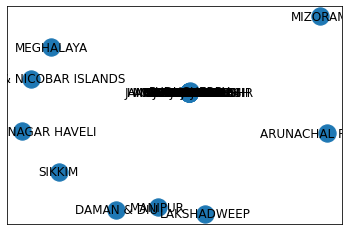

In [51]:
G=nx.from_pandas_adjacency(dfG)
nx.write_gml(G,"Post_Cov_Mig_T.gml")
nx.draw_networkx(G)


In [52]:
df1 = pd.read_csv('Statelatlong.csv',header = None , names =['node', 'latitude', 'longitude'])
lis=[]
for ind in df1.index:
    df1.loc[ind, ('node')]=df1['node'][ind].upper()
    
    lis.append(df1['node'][ind].upper())
lis
lis2=list(G.nodes())
for i in list(G.nodes()):
    temp=df1.loc[df1['node'] == i]
    try:
        G.nodes[i]["longitude"]=temp.iloc[0]["longitude"]
        G.nodes[i]["latitude"]=temp.iloc[0]["latitude"]
    except:
        pass

In [53]:
G.nodes.data()


NodeDataView({'HIMACHAL PRADESH': {'longitude': 77.1734, 'latitude': 31.1048}, 'PUNJAB': {'longitude': 75.8573, 'latitude': 30.901}, 'CHANDIGARH': {'longitude': 76.7794, 'latitude': 30.7333}, 'UTTARAKHAND': {'longitude': 78.0322, 'latitude': 30.3165}, 'HARYANA': {'longitude': 76.6066, 'latitude': 28.8955}, 'RAJASTHAN': {'longitude': 75.7873, 'latitude': 26.9124}, 'UTTAR PRADESH': {'longitude': 80.9462, 'latitude': 26.8467}, 'BIHAR': {'longitude': 85.1376, 'latitude': 25.5941}, 'ARUNACHAL PRADESH': {'longitude': 93.6053, 'latitude': 27.0844}, 'NAGALAND': {'longitude': 94.1086, 'latitude': 25.6751}, 'MANIPUR': {'longitude': 93.9368, 'latitude': 24.816999999999997}, 'MIZORAM': {}, 'TRIPURA': {'longitude': 91.2868, 'latitude': 23.8315}, 'MEGHALAYA': {'longitude': 91.8933, 'latitude': 25.5788}, 'ASSAM': {'longitude': 91.7898, 'latitude': 26.1433}, 'WEST BENGAL': {'longitude': 88.3639, 'latitude': 22.5726}, 'JHARKHAND': {'longitude': 85.3096, 'latitude': 23.3441}, 'ODISHA': {'longitude': 85.

In [54]:
nx.write_gml(G,"Post_Cov_Mig_T.gml")